In [5]:
!pip install yfinance
!pip install bs4
!pip install nbformat

In [6]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [7]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [196]:
def make_graph(stock_data, revenue_data, stock):
    # Filter data based on the date range for stock data and revenue data
    stock_data_specific = stock_data[stock_data.Date <= '2021-06-14'].copy()  # Make a copy to avoid the warning
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30'].copy()  # Make a copy to avoid the warning
    
    # Ensure 'Date' column is of datetime type
    stock_data_specific.loc[:, 'Date'] = pd.to_datetime(stock_data_specific['Date'])  # Use .loc[] to avoid the warning
    revenue_data_specific.loc[:, 'Date'] = pd.to_datetime(revenue_data_specific['Date'])  # Use .loc[] to avoid the warning
    
    # Create a subplot with two rows, one for stock price and another for revenue
    fig = make_subplots(
        rows=2, cols=1, shared_xaxes=True, 
        subplot_titles=("Historical Share Price", "Historical Revenue"), 
        vertical_spacing=0.3
    )
    
    # Add trace for Share Price
    fig.add_trace(
        go.Scatter(
            x=stock_data_specific['Date'], 
            y=stock_data_specific['Close'].astype(float), 
            name="Share Price"
        ), row=1, col=1
    )
    
    # Add trace for Revenue
    fig.add_trace(
        go.Scatter(
            x=revenue_data_specific['Date'], 
            y=revenue_data_specific['Revenue'].astype(float), 
            name="Revenue"
        ), row=2, col=1
    )
    
    # Update x-axis and y-axis for both subplots
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    
    # Update the layout of the plot
    fig.update_layout(
        showlegend=False,
        height=900,
        title=stock,
        xaxis_rangeslider_visible=True
    )
    
    # Show the plot
    fig.show()



In [190]:
tesla = yf.Ticker("TSLA")

In [15]:
tesla_data = tesla.history(period="max")

In [17]:
tesla_data.reset_index(inplace=True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [1]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

In [19]:
html_data  = requests.get(url).text
print(html_data)


<!DOCTYPE html>
<!--[if lt IE 7]>      <html class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!--> <html class="no-js"> <!--<![endif]-->
    <head>
        <meta charset="utf-8">
        <meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">
		<link rel="canonical" href="https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue" />
		<title>Tesla Revenue 2010-2022 | TSLA | MacroTrends</title>
		<meta name="description" content="Tesla annual/quarterly revenue history and growth rate from 2010 to 2022. Revenue can be defined as the amount of money a company receives from its customers in exchange for the sales of goods or services.  Revenue is the top line item on an income statement from which all costs and expenses are subtracted to arrive at net income.    
				
				&lt;ul style='margin-top:10px;'&gt;
				&lt;li&gt;Tesla r

In [163]:
soup = BeautifulSoup(html_data, 'html.parser')
tesla_revenue = pd.DataFrame(columns=["Date","Revenue"])
for row in soup.find_all("tbody")[1].find_all('tr'):
    col = row.find_all("td")
    Date = col[0].text
    Revenue = col[1].text
    tesla_revenue = pd.concat([tesla_revenue,pd.DataFrame({"Date":[Date], "Revenue":[Revenue]})], ignore_index=True) 
    tesla_revenue['Revenue'] = tesla_revenue['Revenue'].replace({r'[\,\$]': ''}, regex=True)
# Check for empty strings or invalid entries, and convert to numeric (after cleaning)
    tesla_revenue['Revenue'] = pd.to_numeric(tesla_revenue['Revenue'], errors='coerce')
# Drop rows where 'Revenue' is NaN (if any)
    tesla_revenue.dropna(subset=['Revenue'], inplace=True)
# Convert the 'Revenue' column to integers (if needed)
    tesla_revenue['Revenue'] = tesla_revenue['Revenue'].astype(int)
    tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]    

In [167]:
tesla_revenue.tail()

,Date,Revenue
48,2010-09-30,31
49,2010-06-30,28
50,2010-03-31,21
51,2009-09-30,46
52,2009-06-30,27


In [60]:
gamestop = yf.Ticker("GME")

In [62]:
gamestop_data = gamestop.history(period="max")

In [64]:
gamestop_data.reset_index(inplace=True)
gamestop_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716073,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666417,1.666417,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


In [66]:
url_2 = "https://web.archive.org/web/20200814131437/https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"

In [70]:
html_data_2  = requests.get(url_2).text
print(html_data_2)
soup = BeautifulSoup(html_data_2, 'html.parser')


<!DOCTYPE html>
<!--[if lt IE 7]>      <html class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!--> <html class="no-js"> <!--<![endif]-->
    <head><script type="text/javascript" src="/_static/js/bundle-playback.js?v=HxkREWBo" charset="utf-8"></script>
<script type="text/javascript" src="/_static/js/wombat.js?v=txqj7nKC" charset="utf-8"></script>
<script>window.RufflePlayer=window.RufflePlayer||{};window.RufflePlayer.config={"autoplay":"on","unmuteOverlay":"hidden"};</script>
<script type="text/javascript" src="/_static/js/ruffle/ruffle.js"></script>
<script type="text/javascript">
    __wm.init("https://web.archive.org/web");
  __wm.wombat("https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue","20200814131437","https://web.archive.org/","web","/_static/",
	      "1597410877");
</script>
<link rel="stylesheet" type="text/css"

In [171]:
soup = BeautifulSoup(html_data_2, 'html.parser')
gamestop_revenue = pd.DataFrame(columns=["Date","Revenue"])
for row in soup.find_all("tbody")[1].find_all('tr'):
    col = row.find_all("td")
    Date = col[0].text
    Revenue = col[1].text
    gamestop_revenue = pd.concat([gamestop_revenue,pd.DataFrame({"Date":[Date], "Revenue":[Revenue]})], ignore_index=True) 
    gamestop_revenue['Revenue'] = gamestop_revenue['Revenue'].replace({r'[\,\$]': ''}, regex=True)
# Check for empty strings or invalid entries, and convert to numeric (after cleaning)
    gamestop_revenue['Revenue'] = pd.to_numeric(gamestop_revenue['Revenue'], errors='coerce')
# Drop rows where 'Revenue' is NaN (if any)
    gamestop_revenue.dropna(subset=['Revenue'], inplace=True)
# Convert the 'Revenue' column to integers (if needed)
    gamestop_revenue['Revenue'] = gamestop_revenue['Revenue'].astype(int)
    gamestop_revenue = gamestop_revenue[gamestop_revenue['Revenue'] != ""] 

In [173]:
gamestop_revenue.tail()

,Date,Revenue
57,2006-01-31,1667
58,2005-10-31,534
59,2005-07-31,416
60,2005-04-30,475
61,2005-01-31,709


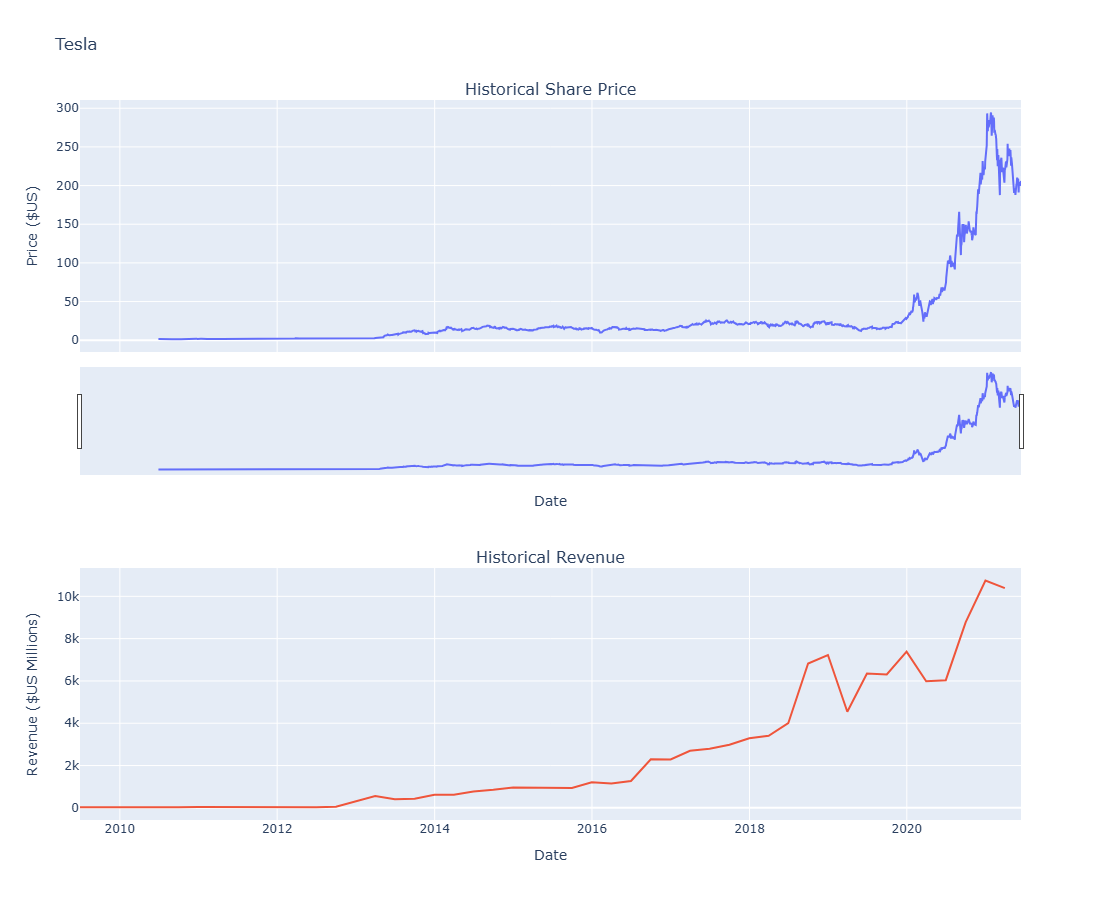

In [200]:
make_graph(tesla_data, tesla_revenue, 'Tesla')

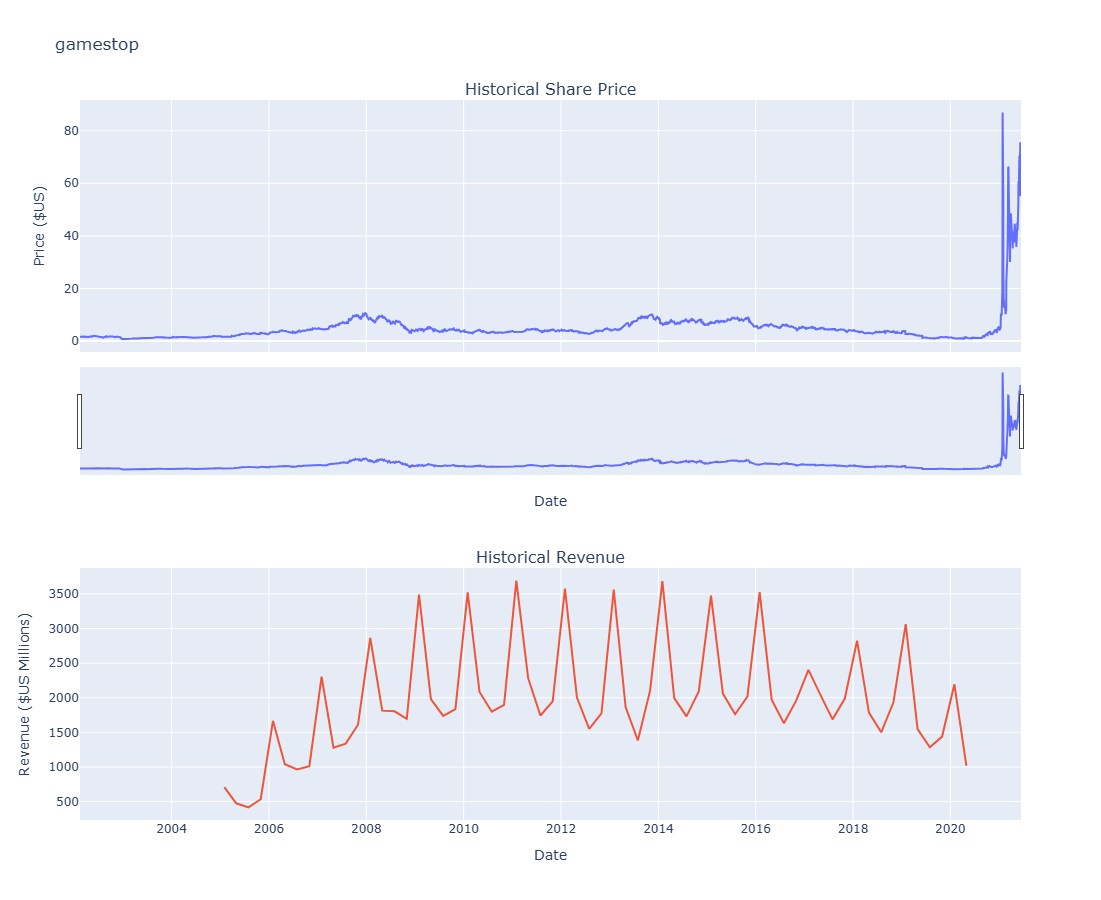

In [198]:
make_graph(gamestop_data, gamestop_revenue, 'gamestop')